In [2]:
import torch
torch.cuda.empty_cache()

In [3]:
import os
dataPath = os.path.join(os.getcwd(), 'snack')
dataPath 

'C:\\Users\\SBA\\pytorch\\pytorchEx\\snack'

In [4]:
# 파일을 잘 불러왔는지 확인
import random
snackPath = os.path.join(dataPath, 'orig')
snackType = os.listdir(snackPath)
print(snackType)
snackFiles = os.listdir(os.path.join(snackPath, snackType[0]))
print(snackFiles)
num = random.randint(0,len(snackType[0]))
print(snackFiles[0])

['banana', 'blueberry', 'choco', 'cone', 'gum', 'octopus', 'shrimp']
['10095_0_m_1.jpg', '10095_0_m_11.jpg', '10095_0_m_14.jpg', '10095_0_m_15.jpg', '10095_0_m_17.jpg', '10095_0_m_19.jpg', '10095_0_m_2.jpg', '10095_0_m_20.jpg', '10095_0_m_23.jpg', '10095_0_m_24.jpg', '10095_0_m_3.jpg', '10095_0_m_4.jpg', '10095_0_m_5.jpg', '10095_0_m_6.jpg', '10095_0_m_7.jpg', '10095_0_m_8.jpg', '10095_0_m_9.jpg', '10095_0_s_11.jpg', '10095_0_s_12.jpg', '10095_0_s_13.jpg', '10095_0_s_14.jpg', '10095_0_s_15.jpg', '10095_0_s_16.jpg', '10095_0_s_17.jpg', '10095_0_s_19.jpg', '10095_0_s_2.jpg', '10095_0_s_20.jpg', '10095_0_s_21.jpg', '10095_0_s_23.jpg', '10095_0_s_3.jpg', '10095_0_s_5.jpg', '10095_0_s_6.jpg', '10095_0_s_7.jpg', '10095_0_s_8.jpg', '10095_0_s_9.jpg', '10095_30_m_1.jpg', '10095_30_m_11.jpg', '10095_30_m_12.jpg', '10095_30_m_13.jpg', '10095_30_m_14.jpg', '10095_30_m_16.jpg', '10095_30_m_17.jpg', '10095_30_m_18.jpg', '10095_30_m_19.jpg', '10095_30_m_2.jpg', '10095_30_m_20.jpg', '10095_30_m_22.jp

In [5]:
# small데이터셋을 위한 폴더를 지정하고 4000장을 나눠서 보관
import os, shutil

sdata = 'sdata2\snack\camaflouge2to7_efficientNet'

if os.path.exists(sdata):
    shutil.rmtree(sdata)
os.makedirs(sdata)

train_sdata = os.path.join(sdata,'train')
valid_sdata = os.path.join(sdata,'valid')
test_sdata = os.path.join(sdata,'test')

trainValidTestList = ['train', 'valid','test']

os.makedirs(train_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

train_sdata_banana = os.path.join(train_sdata,'banana')
train_sdata_blueberry = os.path.join(train_sdata,'blueberry')
train_sdata_choco = os.path.join(train_sdata,'choco')
train_sdata_cone = os.path.join(train_sdata,'cone')
train_sdata_gum = os.path.join(train_sdata,'gum')
train_sdata_octopus = os.path.join(train_sdata,'octopus')
train_sdata_shrimp = os.path.join(train_sdata,'shrimp')
os.makedirs(train_sdata_banana, exist_ok=True)
os.makedirs(train_sdata_blueberry, exist_ok=True)
os.makedirs(train_sdata_choco, exist_ok=True)
os.makedirs(train_sdata_cone, exist_ok=True)
os.makedirs(train_sdata_gum, exist_ok=True)
os.makedirs(train_sdata_octopus, exist_ok=True)
os.makedirs(train_sdata_shrimp, exist_ok=True)

valid_sdata_banana = os.path.join(valid_sdata,'banana')
valid_sdata_blueberry = os.path.join(valid_sdata,'blueberry')
valid_sdata_choco = os.path.join(valid_sdata,'choco')
valid_sdata_cone = os.path.join(valid_sdata,'cone')
valid_sdata_gum = os.path.join(valid_sdata,'gum')
valid_sdata_octopus = os.path.join(valid_sdata,'octopus')
valid_sdata_shrimp = os.path.join(valid_sdata,'shrimp')
os.makedirs(valid_sdata_banana, exist_ok=True)
os.makedirs(valid_sdata_blueberry, exist_ok=True)
os.makedirs(valid_sdata_choco, exist_ok=True)
os.makedirs(valid_sdata_cone, exist_ok=True)
os.makedirs(valid_sdata_gum, exist_ok=True)
os.makedirs(valid_sdata_octopus, exist_ok=True)
os.makedirs(valid_sdata_shrimp, exist_ok=True)

test_sdata_banana = os.path.join(test_sdata,'banana')
test_sdata_blueberry = os.path.join(test_sdata,'blueberry')
test_sdata_choco = os.path.join(test_sdata,'choco')
test_sdata_cone = os.path.join(test_sdata,'cone')
test_sdata_gum = os.path.join(test_sdata,'gum')
test_sdata_octopus = os.path.join(test_sdata,'octopus')
test_sdata_shrimp = os.path.join(test_sdata,'shrimp')
os.makedirs(test_sdata_banana, exist_ok=True)
os.makedirs(test_sdata_blueberry, exist_ok=True)
os.makedirs(test_sdata_choco, exist_ok=True)
os.makedirs(test_sdata_cone, exist_ok=True)
os.makedirs(test_sdata_gum, exist_ok=True)
os.makedirs(test_sdata_octopus, exist_ok=True)
os.makedirs(test_sdata_shrimp, exist_ok=True)

In [6]:
trainRatio = 0.6
validRatio = 0.2
testRatio = 1 - trainRatio - validRatio

In [7]:
import math
snackPath = os.path.join(dataPath, 'orig', snackType[0])
files = os.listdir(snackPath)

train_num = int(trainRatio * len(files)) - 1
valid_num = int(validRatio * len(files)) - 1
test_num  = len(files) - train_num - valid_num - 1 

train_range = [0, train_num-1]
valid_range = [train_num, train_num + valid_num -1]
test_range  = [train_num + valid_num, train_num + valid_num + test_num-1]
print(f'train {train_range} valid {valid_range} test {test_range}')

train [0, 66] valid [67, 87] test [88, 112]


In [8]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정 (데이터셋이 저장된 경로로 수정하세요)
dataset_dir = 'snack'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata2\snack\camaflouge2to7_efficientNet'

# 클래스 목록
classes = ['banana', 'blueberry', 'choco', 'cone', 'gum', 'octopus', 'shrimp']
colors = ['orig', 'camaflouge']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# 폴더 생성 함수
def create_dir(path):
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label, label2):
    srcFiles = os.listdir(src_dir)
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{label2}.{i}.jpg'
        # print(f' fileName {file_name}')
        src_path = os.path.join(src_dir, srcFiles[i])
        # print(f'src {src_path}')
        dst_path = os.path.join(dst_dir, file_name)
        # print(f'dst {dst_path}')
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    if not(cls == 'banana' or cls == 'blueberry'):
        colors = ['orig']
    for co in colors:
        # train dataset 구성 (0~999)
        copy_images(int(train_range[0]/len(colors)), int(train_range[1]/len(colors)), os.path.join(dataset_dir, co, cls), os.path.join(train_dir, cls), cls, co)
        print(train_range[0], train_range[1], dataset_dir, os.path.join(train_dir, cls))
    
        # valid dataset 구성 (1000~1249)
        copy_images(int(valid_range[0]/len(colors)), int(valid_range[1]/len(colors)), os.path.join(dataset_dir, co, cls), os.path.join(valid_dir, cls), cls, co)

        # test dataset 구성 (1250~1499)
        copy_images(int(test_range[0]/len(colors)), int(test_range[1]/len(colors)), os.path.join(dataset_dir, co, cls), os.path.join(test_dir, cls), cls, co)

print("데이터셋 분할 및 복사가 완료되었습니다.")

0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\banana
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\banana
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\blueberry
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\blueberry
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\choco
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\cone
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\gum
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\octopus
0 66 snack sdata2\snack\camaflouge2to7_efficientNet\train\shrimp
데이터셋 분할 및 복사가 완료되었습니다.


In [9]:
dirList = [train_sdata_banana, train_sdata_blueberry, train_sdata_choco, train_sdata_cone, train_sdata_gum, train_sdata_octopus, train_sdata_shrimp,
           valid_sdata_banana, valid_sdata_blueberry, valid_sdata_choco, valid_sdata_cone, valid_sdata_gum, valid_sdata_octopus, valid_sdata_shrimp,
           test_sdata_banana, test_sdata_blueberry, test_sdata_choco, test_sdata_cone, test_sdata_gum, test_sdata_octopus, test_sdata_shrimp]

for dir in dirList:
    print(len(os.listdir(dir)))

68
68
67
67
67
67
67
22
22
21
21
21
21
21
26
26
25
25
25
25
25


In [10]:
# 위에서 복사된 파일들 갯수 확인하기
train_banana = os.listdir(os.path.join(train_dir,'banana'))
train_blueberry = os.listdir(os.path.join(train_dir,'blueberry'))
train_choco = os.listdir(os.path.join(train_dir,'choco'))
train_cone = os.listdir(os.path.join(train_dir,'cone'))
train_gum = os.listdir(os.path.join(train_dir,'gum'))
train_octopus = os.listdir(os.path.join(train_dir,'octopus'))
train_shrimp = os.listdir(os.path.join(train_dir,'shrimp'))

valid_banana = os.listdir(os.path.join(test_dir,'banana'))
valid_blueberry = os.listdir(os.path.join(test_dir,'blueberry'))
valid_choco = os.listdir(os.path.join(test_dir,'choco'))
valid_cone = os.listdir(os.path.join(test_dir,'cone'))
valid_gum = os.listdir(os.path.join(test_dir,'gum'))
valid_octopus = os.listdir(os.path.join(test_dir,'octopus'))
valid_shrimp = os.listdir(os.path.join(test_dir,'shrimp'))

test_banana = os.listdir(os.path.join(test_dir,'banana'))
test_blueberry = os.listdir(os.path.join(test_dir,'blueberry'))
test_choco = os.listdir(os.path.join(test_dir,'choco'))
test_cone = os.listdir(os.path.join(test_dir,'cone'))
test_gum = os.listdir(os.path.join(test_dir,'gum'))
test_octopus = os.listdir(os.path.join(test_dir,'octopus'))
test_shrimp = os.listdir(os.path.join(test_dir,'shrimp'))

#위의 6개 폴더 파일 갯수 확인하기
print(len(train_banana),len(train_blueberry), len(train_choco),len(train_cone), len(train_gum),len(train_octopus), len(train_shrimp),
      len(valid_banana),len(valid_blueberry), len(valid_choco),len(valid_cone), len(valid_gum),len(valid_octopus), len(valid_shrimp),
      len(test_banana),len(test_blueberry), len(test_choco),len(test_cone), len(test_gum),len(test_octopus), len(test_shrimp))

68 68 67 67 67 67 67 26 26 25 25 25 25 25 26 26 25 25 25 25 25


In [11]:
import cv2
print(train_dir)
img = cv2.imread(os.path.join(os.path.join(train_dir,'banana', train_banana[3])))
print(train_banana[3])
img

sdata2\snack\camaflouge2to7_efficientNet\train
banana.camaflouge.11.jpg


array([[[195, 197, 197],
        [194, 196, 196],
        [194, 196, 196],
        ...,
        [199, 204, 203],
        [199, 204, 203],
        [200, 205, 204]],

       [[196, 198, 198],
        [194, 196, 196],
        [195, 197, 197],
        ...,
        [199, 204, 203],
        [199, 204, 203],
        [199, 204, 203]],

       [[196, 198, 198],
        [195, 197, 197],
        [196, 198, 198],
        ...,
        [200, 205, 204],
        [201, 206, 205],
        [199, 204, 203]],

       ...,

       [[217, 212, 209],
        [214, 209, 206],
        [212, 207, 204],
        ...,
        [226, 221, 218],
        [227, 222, 219],
        [225, 220, 217]],

       [[215, 210, 207],
        [213, 208, 205],
        [211, 206, 203],
        ...,
        [221, 216, 213],
        [224, 219, 216],
        [223, 218, 215]],

       [[214, 209, 206],
        [213, 208, 205],
        [212, 207, 204],
        ...,
        [222, 217, 214],
        [224, 219, 216],
        [222, 217, 214]]

In [12]:
from torchvision import transforms

org_size =(224,224)
img_size = 224

visual_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    ])

train_transform = transforms.Compose([
    #이미지 사이즈가 파일마다 제 각각
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [13]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import os

# Custom ImageFolder to return file name along with image and label
class ImageFolderWithFilenames(ImageFolder):
    def __getitem__(self, index):
        # Get the original tuple (image, label)
        original_tuple = super(ImageFolderWithFilenames, self).__getitem__(index)

        # Get the image file path
        path, _ = self.samples[index]
        # Return the image, label, and the file name (path)
        return original_tuple + (path,)

In [14]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

folderPath = 'sdata2\snack\camaflouge2to7_efficientNet'
data_dir = os.path.join(os.getcwd(), folderPath)

batch_size = 32

visual_data = ImageFolder(root= os.path.join(data_dir, 'train'), transform=visual_transform)
train_data = ImageFolder(root= os.path.join(data_dir, 'train'), transform=train_transform)
valid_data = ImageFolder(root= os.path.join(data_dir, 'valid'), transform=test_transform)
test_data = ImageFolderWithFilenames(root= os.path.join(data_dir, 'test'), transform=test_transform)

visual_loader = DataLoader(visual_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

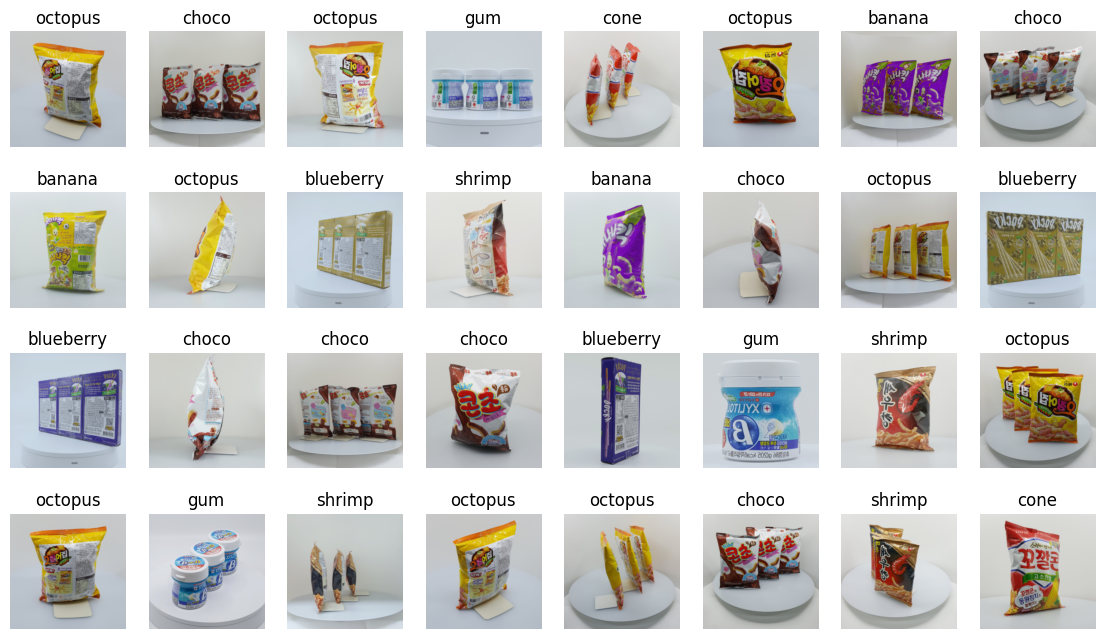

In [15]:
import matplotlib.pyplot as plt

# train데이터가 2000장이 있는데, 32장씩 데이터를 가져온다.
images, labels = next(iter(visual_loader))

classes ={0:'banana', 1:'blueberry', 2:'choco', 3:'cone', 4:'gum', 5:'octopus', 6:'shrimp'}

fig = plt.figure(figsize=(14, 8))
for i in range(batch_size):
    # 4행 8열
    ax = fig.add_subplot(4, 8, i + 1)
    ax.set_title(classes[labels[i].item()])
    ax.axis('off')
    # 컬러 채널 순서를 재정렬
    ax.imshow(images[i].permute(1, 2, 0))

plt.show()

In [22]:
import torch
from torchvision.models import resnet50, mobilenet_v3_large
from efficientnet_pytorch import EfficientNet

isResnet50 = False

device='cuda' if torch.cuda.is_available() else 'cpu'

# ImageNet에 사전학습된 모델을 가져와서 학습(Train)
# 분류기는 제외하고 특징 추출기만 사용

if isResnet50:
    model = resnet50(pretrained=True).to(device)
else:
    model = EfficientNet.from_pretrained('efficientnet-b0').to(device)
    
model

Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [23]:
# model = resnet50(pretrained=True).to(device)

# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc -> 분류기 in_features -> 분류기의 입력
num_features = model._fc.in_features

# num_classes: 분류해야 할 클래스 수 (예: 3개의 클래스)
num_classes = 7

# 분류기 부분을 Softmax 활성화 함수로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),  # 입력에서 256개의 노드로 연결
    torch.nn.ReLU(),                     # 활성화 함수 ReLU
    torch.nn.Linear(256, num_classes)    # 최종 분류 클래스의 수에 맞게 출력 노드 수 설정
).to(device)

In [24]:
import time
from tqdm import tqdm

# 학습 진행
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    if resume==False:
        # 그래프로 출력하기 위한 리스트
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()

        # 훈련 모드
        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            optimizer.zero_grad()
            outputs = model(train_x)

            # softmax + loss
            loss = criterion(outputs, train_y)

            loss.backward()
            optimizer.step()

            # batch마다 train_loss를 누적
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == train_y).sum().item()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                outputs = model(valid_x)
                loss = criterion(outputs, valid_y)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                valid_correct += (predicted == valid_y).sum().item()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        scheduler.step(valid_loss)
        # 현재 learning_rate 값을 읽어올 수 있다.
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1}: {now_lr:.8f}')

        # EarlyStopping을 호출하여 학습 중단 여부 확인
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
        print('-' * 100)

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

In [25]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=10)
early_stopping = EarlyStopping(patience=10, verbose=True, path='resnet50_best.pth')

100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.48s/it]


47.849sec : [Epoch 1/25] -> train loss: 7.4897, train acc: 0.000% / valid loss: 8.3117, valid acc: 0.000%
learning_rate 1: 0.00001000
Validation loss decreased (inf --> 41.558264).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.43s/it]


47.090sec : [Epoch 2/25] -> train loss: 7.2079, train acc: 0.000% / valid loss: 7.8375, valid acc: 0.000%
learning_rate 2: 0.00001000
Validation loss decreased (41.558264 --> 39.187290).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.44s/it]


47.540sec : [Epoch 3/25] -> train loss: 6.8866, train acc: 0.000% / valid loss: 7.4595, valid acc: 0.000%
learning_rate 3: 0.00001000
Validation loss decreased (39.187290 --> 37.297476).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.48s/it]


47.876sec : [Epoch 4/25] -> train loss: 6.5670, train acc: 0.212% / valid loss: 7.1130, valid acc: 0.000%
learning_rate 4: 0.00001000
Validation loss decreased (37.297476 --> 35.565095).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.45s/it]


47.818sec : [Epoch 5/25] -> train loss: 6.3079, train acc: 0.849% / valid loss: 6.8220, valid acc: 0.000%
learning_rate 5: 0.00001000
Validation loss decreased (35.565095 --> 34.109859).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.48s/it]


48.113sec : [Epoch 6/25] -> train loss: 6.0073, train acc: 1.486% / valid loss: 6.5173, valid acc: 0.000%
learning_rate 6: 0.00001000
Validation loss decreased (34.109859 --> 32.586743).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.46s/it]


47.701sec : [Epoch 7/25] -> train loss: 5.6914, train acc: 3.185% / valid loss: 6.1839, valid acc: 0.000%
learning_rate 7: 0.00001000
Validation loss decreased (32.586743 --> 30.919614).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.44s/it]


47.194sec : [Epoch 8/25] -> train loss: 5.3500, train acc: 6.157% / valid loss: 5.8930, valid acc: 1.342%
learning_rate 8: 0.00001000
Validation loss decreased (30.919614 --> 29.465168).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.44s/it]


47.431sec : [Epoch 9/25] -> train loss: 5.0665, train acc: 10.828% / valid loss: 5.5841, valid acc: 2.013%
learning_rate 9: 0.00001000
Validation loss decreased (29.465168 --> 27.920277).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.45s/it]


47.498sec : [Epoch 10/25] -> train loss: 4.7440, train acc: 18.471% / valid loss: 5.2444, valid acc: 4.027%
learning_rate 10: 0.00001000
Validation loss decreased (27.920277 --> 26.221999).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.48s/it]


47.867sec : [Epoch 11/25] -> train loss: 4.3571, train acc: 26.327% / valid loss: 4.8593, valid acc: 9.396%
learning_rate 11: 0.00001000
Validation loss decreased (26.221999 --> 24.296525).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.48s/it]


47.839sec : [Epoch 12/25] -> train loss: 4.1019, train acc: 32.696% / valid loss: 4.4932, valid acc: 12.081%
learning_rate 12: 0.00001000
Validation loss decreased (24.296525 --> 22.465760).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.45s/it]


47.662sec : [Epoch 13/25] -> train loss: 3.7766, train acc: 44.161% / valid loss: 4.1445, valid acc: 24.161%
learning_rate 13: 0.00001000
Validation loss decreased (22.465760 --> 20.722746).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.44s/it]


47.547sec : [Epoch 14/25] -> train loss: 3.3823, train acc: 54.352% / valid loss: 3.8567, valid acc: 30.201%
learning_rate 14: 0.00001000
Validation loss decreased (20.722746 --> 19.283606).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.47s/it]


47.785sec : [Epoch 15/25] -> train loss: 3.1683, train acc: 61.146% / valid loss: 3.4387, valid acc: 34.899%
learning_rate 15: 0.00001000
Validation loss decreased (19.283606 --> 17.193412).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.44s/it]


47.353sec : [Epoch 16/25] -> train loss: 2.8310, train acc: 68.153% / valid loss: 3.1506, valid acc: 39.597%
learning_rate 16: 0.00001000
Validation loss decreased (17.193412 --> 15.753222).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.46s/it]


47.622sec : [Epoch 17/25] -> train loss: 2.6235, train acc: 71.975% / valid loss: 2.8755, valid acc: 47.651%
learning_rate 17: 0.00001000
Validation loss decreased (15.753222 --> 14.377374).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.43s/it]


47.163sec : [Epoch 18/25] -> train loss: 2.1736, train acc: 81.529% / valid loss: 2.5896, valid acc: 54.362%
learning_rate 18: 0.00001000
Validation loss decreased (14.377374 --> 12.947790).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.47s/it]


47.712sec : [Epoch 19/25] -> train loss: 1.9835, train acc: 86.200% / valid loss: 2.4567, valid acc: 57.718%
learning_rate 19: 0.00001000
Validation loss decreased (12.947790 --> 12.283627).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.48s/it]


48.137sec : [Epoch 20/25] -> train loss: 1.7437, train acc: 89.384% / valid loss: 2.1981, valid acc: 65.772%
learning_rate 20: 0.00001000
Validation loss decreased (12.283627 --> 10.990550).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.47s/it]


47.683sec : [Epoch 21/25] -> train loss: 1.4944, train acc: 91.720% / valid loss: 2.0406, valid acc: 67.785%
learning_rate 21: 0.00001000
Validation loss decreased (10.990550 --> 10.202887).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.47s/it]


47.983sec : [Epoch 22/25] -> train loss: 1.2932, train acc: 93.418% / valid loss: 1.8827, valid acc: 68.456%
learning_rate 22: 0.00001000
Validation loss decreased (10.202887 --> 9.413493).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:35<00:00,  2.39s/it]


46.390sec : [Epoch 23/25] -> train loss: 1.2457, train acc: 92.781% / valid loss: 1.7265, valid acc: 71.141%
learning_rate 23: 0.00001000
Validation loss decreased (9.413493 --> 8.632673).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.44s/it]


47.209sec : [Epoch 24/25] -> train loss: 1.1225, train acc: 92.781% / valid loss: 1.6085, valid acc: 73.826%
learning_rate 24: 0.00001000
Validation loss decreased (8.632673 --> 8.042503).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.45s/it]


47.480sec : [Epoch 25/25] -> train loss: 0.9029, train acc: 96.603% / valid loss: 1.5047, valid acc: 75.168%
learning_rate 25: 0.00001000
Validation loss decreased (8.042503 --> 7.523288).  Saving model ...
----------------------------------------------------------------------------------------------------


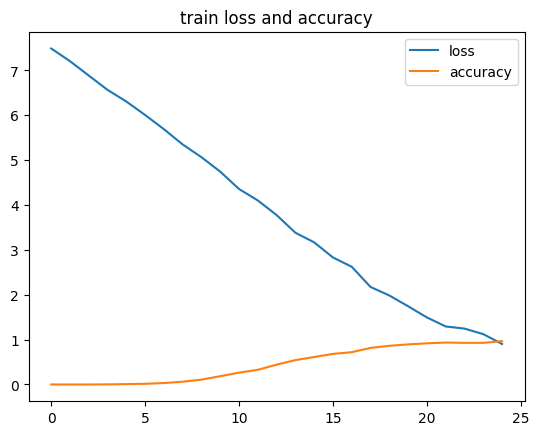

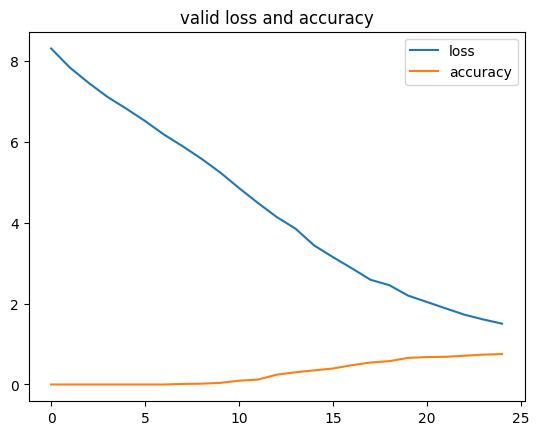

In [26]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

LR = 0.00001
EPOCHS = 1
# 손실함수
# 신경망에 sigmoid를 썼으므로 BCELoss()사용
# 만약 신경망에 softmax를 썼다면 CrossEntropyLoss()사용
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer정의
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# scheduler 추가
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 학습
fit(model, criterion, optimizer, EPOCHS, train_loader, valid_loader, resume=False)

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# 테스트 데이터에서 성능을 평가하고, 예측이 잘못된 이미지를 시각화하는 함수
def evaluate_and_visualize(model, test_loader, criterion):
    test_loss = 0
    test_correct = 0
    test_total = 0
    #incorrect_images = []
    incorrect_labels = []
    incorrect_preds = []
    incorrect_filenames = []
    preds = []
    labels = []

    print(f'test loader: {test_loader}')
    
    model.eval()
    with torch.no_grad():
        for test_x, test_y, filenames in tqdm(test_loader):
            test_x, test_y = test_x.to(device), test_y.to(device)
            print(test_y)
            print(type(test_y))
            outputs = model(test_x)
            loss = criterion(outputs, test_y)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            # 정확도 계산
            test_correct += (predicted == test_y).sum().item()
            test_total += test_y.size(0)
            preds.append(predicted.cpu().numpy())
            labels.append(test_y.cpu().numpy())

            if predicted != test_y:
                incorrect_labels.append(test_y.cpu().numpy())
                incorrect_preds.append(predicted.cpu().numpy())
                incorrect_filenames.append(filenames[0])

    test_accuracy = test_correct / test_total
    print("test_correct:{}, test_total:{}".format(test_correct, test_total))
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    print(len(incorrect_filenames))

    # 예측이 잘못된 이미지 시각화
    fig = plt.figure(figsize=(12, 12))
    for i in range(min(16, len(incorrect_filenames))):
        ax = fig.add_subplot(4, 4, i + 1)
        image = Image.open(incorrect_filenames[i])
        ax.imshow(image)
        label_dict = {0: 'banana', 1: 'blueberry', 2: 'choco', 3: 'cone', 4: 'gum', 5: 'octopus', 6: 'shrimp'}
        
        for i in range(len(incorrect_labels)):
            true_label = label_dict.get(int(incorrect_labels[i]), 'Unknown')
            pred_label = label_dict.get(int(incorrect_preds[i]), 'Unknown')
        # filename = os.path.basename(incorrect_filenames[i])
        # ax.set_title(f'Pred: {pred_label}, Label: {true_label}, {filename}', fontsize=10)
        ax.set_title(f'Pred: {pred_label}, Label: {true_label}', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    # print(f'preds: {preds}')
    # print(f'labels: {labels}')
    return preds, labels

test loader: <torch.utils.data.dataloader.DataLoader object at 0x0000017003AB1C90>


  1%|▍                                                                              | 1/177 [00:00<00:24,  7.26it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


  3%|██▏                                                                            | 5/177 [00:00<00:12, 13.72it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


  6%|████▍                                                                         | 10/177 [00:00<00:09, 16.91it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


  7%|█████▎                                                                        | 12/177 [00:00<00:09, 17.34it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


  9%|███████                                                                       | 16/177 [00:01<00:11, 14.43it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


 11%|████████▊                                                                     | 20/177 [00:01<00:11, 13.16it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


 12%|█████████▋                                                                    | 22/177 [00:01<00:12, 12.75it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


 15%|███████████▍                                                                  | 26/177 [00:01<00:12, 12.49it/s]

tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>
tensor([0], device='cuda:0')
<class 'torch.Tensor'>


 16%|████████████▊                                                                 | 29/177 [00:02<00:09, 14.88it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 19%|██████████████▉                                                               | 34/177 [00:02<00:08, 17.09it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 21%|████████████████▋                                                             | 38/177 [00:02<00:07, 17.66it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 24%|██████████████████▌                                                           | 42/177 [00:02<00:08, 15.39it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 25%|███████████████████▍                                                          | 44/177 [00:03<00:09, 13.44it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 26%|████████████████████▎                                                         | 46/177 [00:03<00:10, 12.54it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 28%|██████████████████████                                                        | 50/177 [00:03<00:10, 12.10it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([1], device='cuda:0')
<class 'torch.Tensor'>


 29%|██████████████████████▉                                                       | 52/177 [00:03<00:10, 11.86it/s]

tensor([1], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 32%|████████████████████████▋                                                     | 56/177 [00:04<00:10, 11.17it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 33%|█████████████████████████▌                                                    | 58/177 [00:04<00:14,  8.09it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 34%|██████████████████████████▍                                                   | 60/177 [00:04<00:13,  8.83it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 36%|████████████████████████████▏                                                 | 64/177 [00:05<00:11, 10.21it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 37%|█████████████████████████████                                                 | 66/177 [00:05<00:10, 10.86it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 40%|██████████████████████████████▊                                               | 70/177 [00:05<00:09, 11.21it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 41%|███████████████████████████████▋                                              | 72/177 [00:05<00:09, 11.30it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 43%|█████████████████████████████████▍                                            | 76/177 [00:06<00:08, 11.82it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([2], device='cuda:0')
<class 'torch.Tensor'>


 44%|██████████████████████████████████▎                                           | 78/177 [00:06<00:08, 12.25it/s]

tensor([2], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 45%|███████████████████████████████████▎                                          | 80/177 [00:06<00:08, 11.89it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 47%|█████████████████████████████████████                                         | 84/177 [00:06<00:07, 11.64it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 49%|█████████████████████████████████████▉                                        | 86/177 [00:06<00:07, 11.64it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 51%|███████████████████████████████████████▋                                      | 90/177 [00:07<00:07, 11.29it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 52%|████████████████████████████████████████▌                                     | 92/177 [00:07<00:07, 11.10it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 54%|██████████████████████████████████████████▎                                   | 96/177 [00:07<00:07, 10.78it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 55%|███████████████████████████████████████████▏                                  | 98/177 [00:08<00:07, 10.69it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 56%|███████████████████████████████████████████▌                                 | 100/177 [00:08<00:07, 10.16it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([3], device='cuda:0')
<class 'torch.Tensor'>


 58%|████████████████████████████████████████████▎                                | 102/177 [00:08<00:08,  8.77it/s]

tensor([3], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 60%|██████████████████████████████████████████████                               | 106/177 [00:08<00:06, 10.25it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 61%|██████████████████████████████████████████████▉                              | 108/177 [00:09<00:06, 10.78it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 63%|████████████████████████████████████████████████▋                            | 112/177 [00:09<00:05, 11.62it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 64%|█████████████████████████████████████████████████▌                           | 114/177 [00:09<00:05, 11.40it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 67%|███████████████████████████████████████████████████▎                         | 118/177 [00:09<00:04, 11.86it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 68%|████████████████████████████████████████████████████▏                        | 120/177 [00:10<00:04, 11.74it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 70%|█████████████████████████████████████████████████████▉                       | 124/177 [00:10<00:04, 11.98it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 71%|██████████████████████████████████████████████████████▊                      | 126/177 [00:10<00:04, 11.94it/s]

tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>
tensor([4], device='cuda:0')
<class 'torch.Tensor'>


 72%|███████████████████████████████████████████████████████▋                     | 128/177 [00:10<00:04, 11.88it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 75%|█████████████████████████████████████████████████████████▍                   | 132/177 [00:11<00:03, 11.36it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 76%|██████████████████████████████████████████████████████████▎                  | 134/177 [00:11<00:03, 11.44it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 78%|████████████████████████████████████████████████████████████                 | 138/177 [00:11<00:03, 11.30it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 79%|████████████████████████████████████████████████████████████▉                | 140/177 [00:11<00:03, 11.08it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 81%|██████████████████████████████████████████████████████████████▋              | 144/177 [00:12<00:02, 11.12it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 82%|███████████████████████████████████████████████████████████████▌             | 146/177 [00:12<00:02, 10.84it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 85%|█████████████████████████████████████████████████████████████████▎           | 150/177 [00:12<00:02, 10.16it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([5], device='cuda:0')
<class 'torch.Tensor'>


 86%|██████████████████████████████████████████████████████████████████▌          | 153/177 [00:13<00:02,  9.64it/s]

tensor([5], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 87%|██████████████████████████████████████████████████████████████████▉          | 154/177 [00:13<00:02,  9.40it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 89%|████████████████████████████████████████████████████████████████████▎        | 157/177 [00:13<00:02,  9.46it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 89%|████████████████████████████████████████████████████████████████████▋        | 158/177 [00:13<00:02,  8.88it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 91%|██████████████████████████████████████████████████████████████████████       | 161/177 [00:13<00:01,  9.34it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 93%|███████████████████████████████████████████████████████████████████████▊     | 165/177 [00:14<00:01, 11.02it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 94%|████████████████████████████████████████████████████████████████████████▋    | 167/177 [00:14<00:00, 11.33it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 97%|██████████████████████████████████████████████████████████████████████████▍  | 171/177 [00:14<00:00, 11.91it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


 98%|███████████████████████████████████████████████████████████████████████████▎ | 173/177 [00:14<00:00, 11.89it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>


100%|█████████████████████████████████████████████████████████████████████████████| 177/177 [00:15<00:00, 11.61it/s]

tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
tensor([6], device='cuda:0')
<class 'torch.Tensor'>
test_correct:106, test_total:177
Test Loss: 2.0773, Test Accuracy: 59.89%
71



C:\Users\SBA\AppData\Local\Temp\ipykernel_10048\3633241634.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = label_dict.get(int(incorrect_labels[i]), 'Unknown')
C:\Users\SBA\AppData\Local\Temp\ipykernel_10048\3633241634.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = label_dict.get(int(incorrect_preds[i]), 'Unknown')


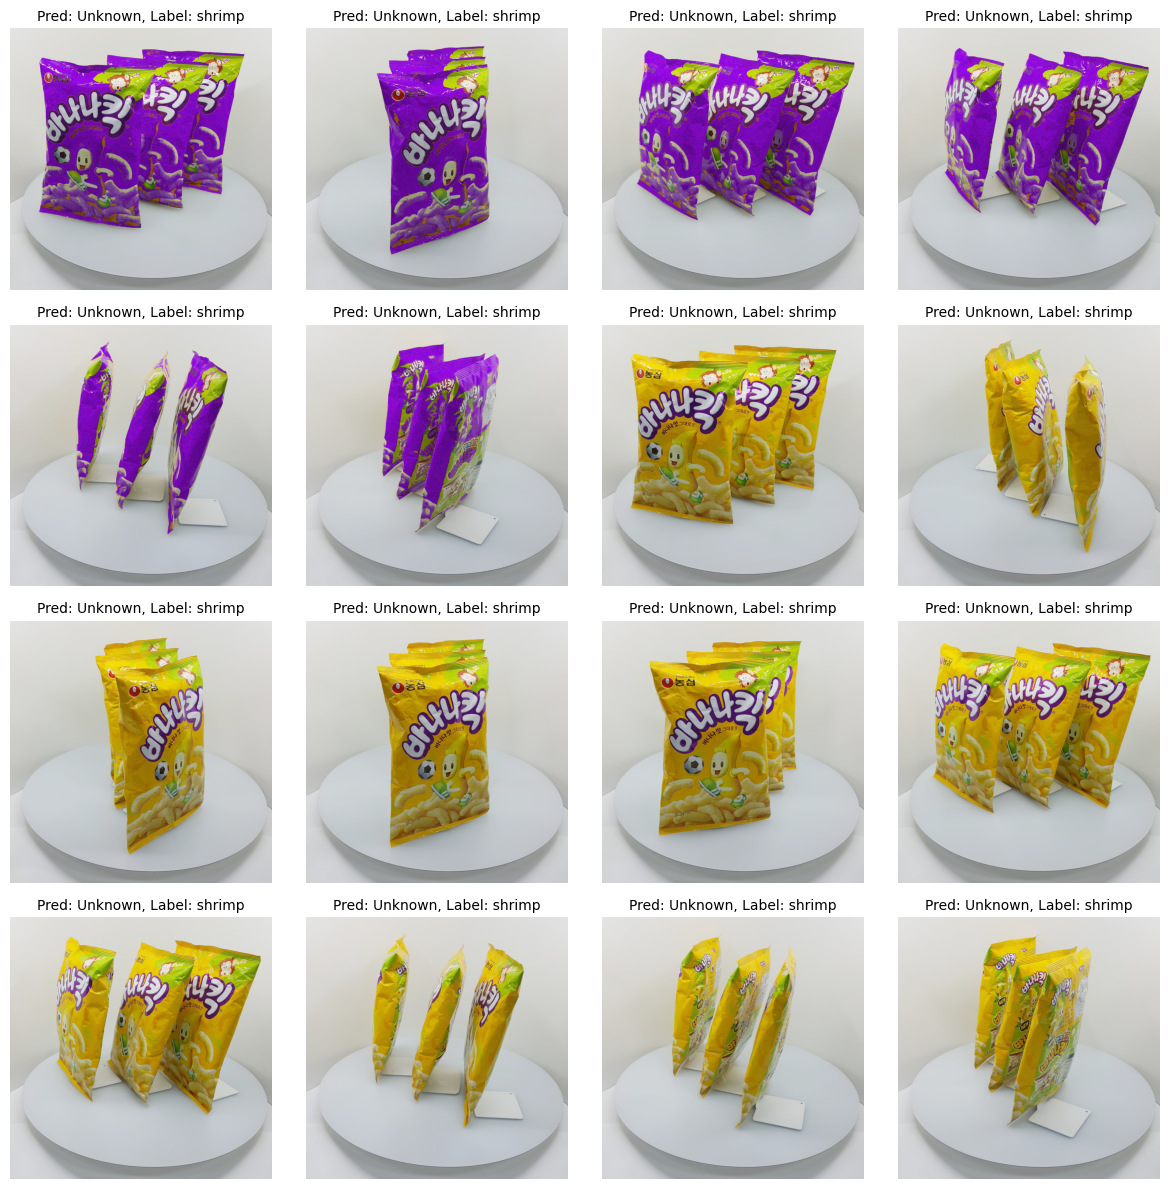

In [30]:
# 테스트 데이터를 통해 성능 평가 및 잘못된 예측 시각화
preds, labels = evaluate_and_visualize(model, test_loader, criterion)

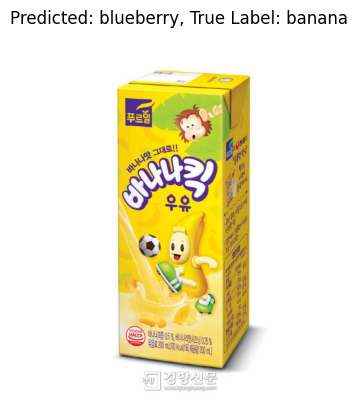

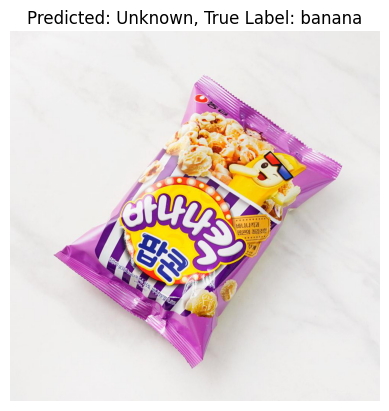

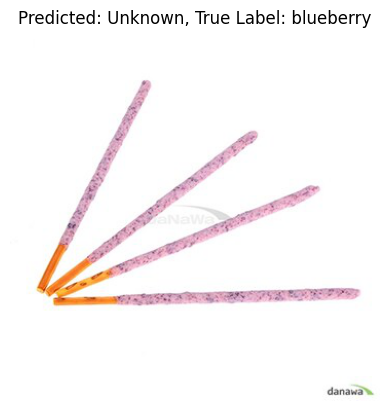

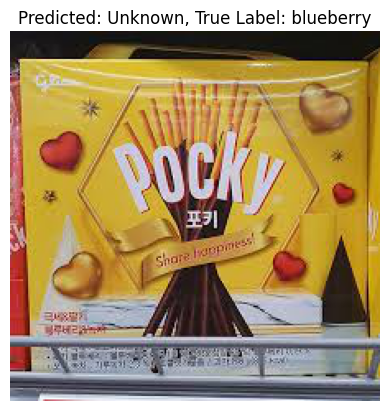

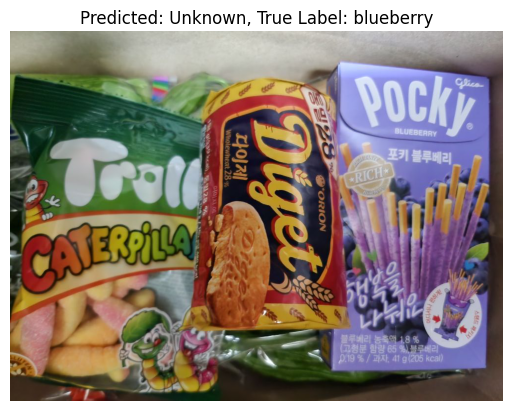

In [40]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

 # Assuming the model is already loaded and `label_dict` contains the mapping of class indices to labels
label_dict = {0: 'banana', 1: 'blueberry', 2: 'choco', 3: 'cone', 4: 'gum', 5: 'octopus', 6: 'shrimp'}

# Function to classify and display an image
def classify_and_show_image(model, image_path, device='cpu'):
    # Define preprocessing transformations (these should match the ones used during training)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the input size expected by the model
        transforms.ToTensor(),  # Convert the image to a PyTorch tensor
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalization
    ])
    
    # Load the image and ensure it's an RGB image
    image = Image.open(image_path).convert('RGB')  # Convert to RGB to ensure 3 channels
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Make sure the model is in evaluation mode
    model = model.to(device)
    model.eval()

    # Make predictions
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_class = torch.max(output, 1)
    
    # Get the predicted label (handle unexpected predictions)
    predicted_label = label_dict.get(predicted_class.item(), 'Unknown')
    true_label = os.path.basename(image_path).split(".")[0]

    # Plot the image and show prediction
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}, True Label: {true_label}")
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage:
baseDir = os.getcwd()
uploadDir = os.path.join(baseDir, 'upload', 'snack')
# Detect if a GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for file in os.listdir(uploadDir): 
    image_path = os.path.join(uploadDir, file)  # Replace with the path to your image
    # Replace with the true label of the image
    classify_and_show_image(model, image_path, device)

In [41]:
def evaluate_model(model, data_loader):
    model.eval()
    total = 0
    correct = 0
    loss_total = 0
    all_targets = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labelsx)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss_total += loss.item()
            all_targets.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    val_loss = loss_total / len(data_loader)
    val_acc = 100 * correct / total
    val_f1 = f1_score(all_targets, all_preds, average='macro')
    return val_loss, val_acc, val_f1, all_preds, all_targets

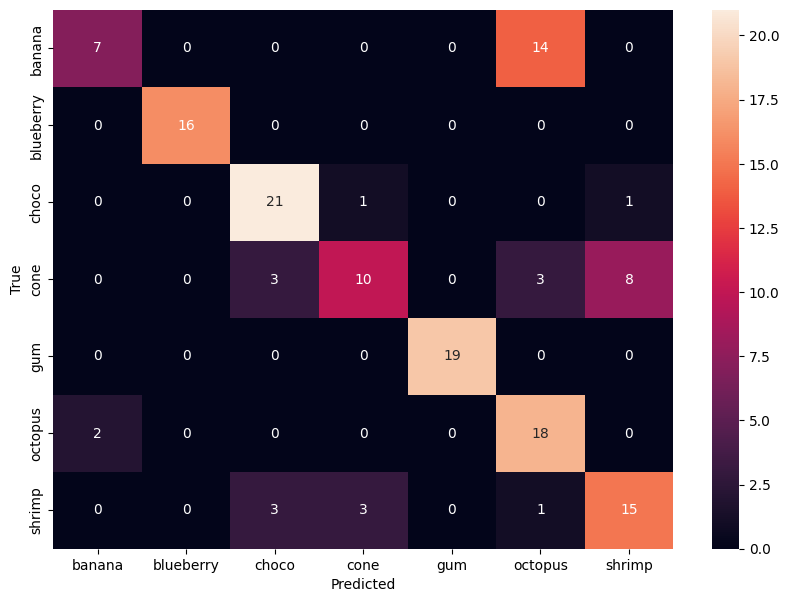

In [44]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

class_names = ['banana', 'blueberry', 'choco', 'cone', 'gum', 'octopus', 'shrimp']

def plot_confusion_matrix(labels, predictions, class_names):
    cm = confusion_matrix(labels, predictions, labels=np.arange(len(class_names)))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(labels, preds, class_names)